# Performance plots



In [82]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import product

%matplotlib inline

In [4]:
df = pd.read_csv(filepath_or_buffer="benchmark_results/results.csv")

In [86]:
!pip3 install statsmodels

  Using cached statsmodels-0.11.1-cp37-cp37m-macosx_10_13_x86_64.whl (8.4 MB)
  Using cached patsy-0.5.1-py2.py3-none-any.whl (231 kB)
You should consider upgrading via the '/Users/csefalvayk/Developer/jampi-spark-dotmarix/paper/venv/bin/python -m pip install --upgrade pip' command.


## Fig. 2: Comparative performance of JAMPI, native MPI and MLlib on random matrices of various dimensions, on 1, 16, 64 and 256 cores

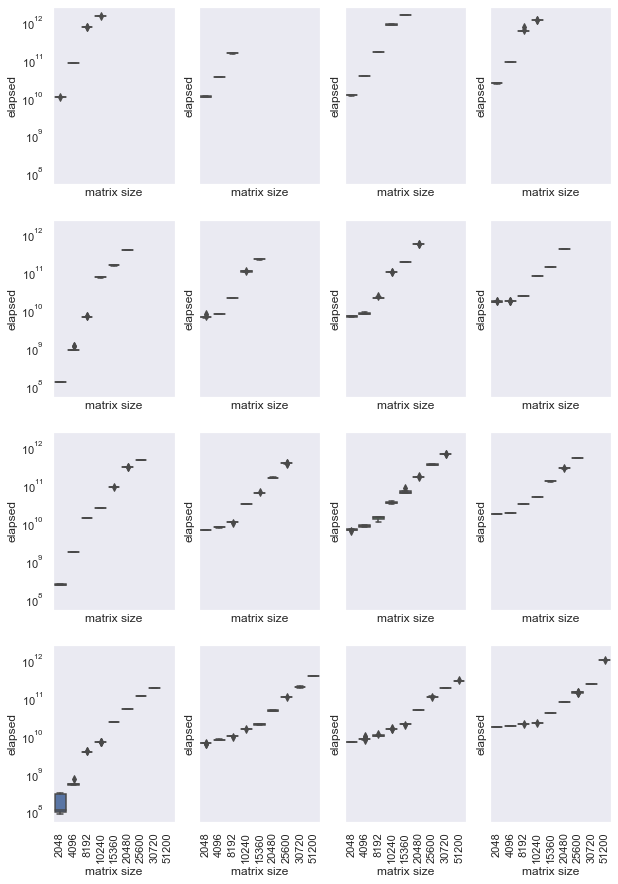

In [54]:
sns.set(style="dark")
f, axes = plt.subplots(4, 4, figsize=(10, 15), sharex=True, sharey=True)

vals = list(product([1, 16, 64, 256], ["mpi", "MLlib", "MLlib (op)", "jampi"]))

for idx, _ in enumerate(vals):
    procs, runts = vals[idx]
    d = df[(df.processors == procs) & (df.app == runts)]
    g = sns.boxplot(x = "matrix size", y = "elapsed", ax=axes[idx//4, idx%4], data=d)
    g.set_yscale("log")
    g.set_xticklabels(g.get_xticklabels(), rotation=90)

/Users/csefalvayk/Developer/jampi-spark-dotmarix/paper/venv/lib/python3.7/site-packages/seaborn/regression.py:255: RankWarning: Polyfit may be poorly conditioned
  yhat = reg_func(x, y)
/Users/csefalvayk/Developer/jampi-spark-dotmarix/paper/venv/lib/python3.7/site-packages/seaborn/algorithms.py:85: RankWarning: Polyfit may be poorly conditioned
  boot_dist.append(f(*sample, **func_kwargs))


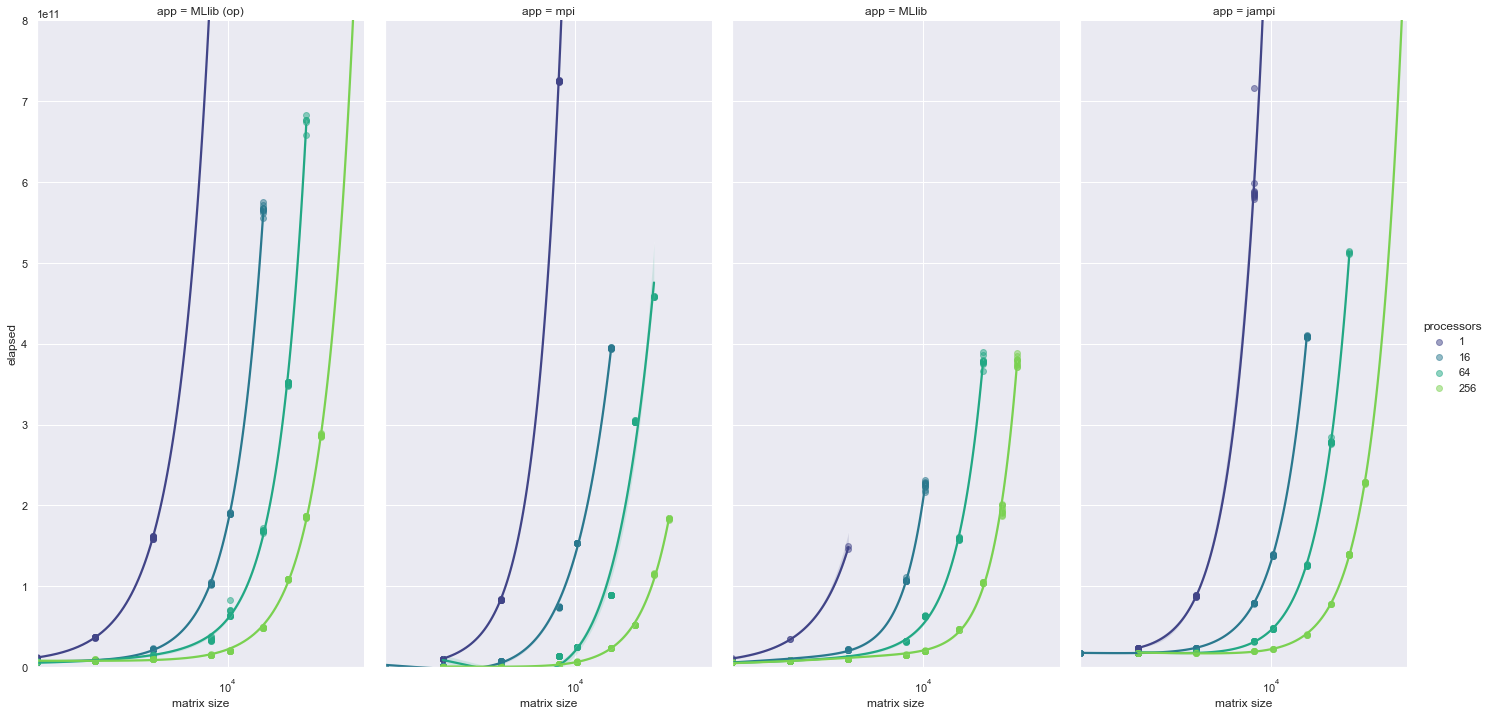

In [105]:
sns.set_context("paper")
sns.set(color_codes=True)

g = sns.lmplot(x="matrix size",
               y="elapsed",
               col="app",
               hue="processors",
               data=df,
               scatter_kws={"alpha": 0.5},
               height=10,
               aspect=1 / 2,
               sharex=True,
               sharey=True,
               order=3,
               palette="viridis")
g.set(xscale="log")
g.set(ylim=(0, 0.8e12))
g.savefig("figures/overall_performance.pdf")